In [147]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#### Wczytanie danych

In [148]:
dataframe = pd.read_csv('resources/datasets/sp_retro/discretized.csv', na_values=('?',))

In [149]:
dataframe.head()

,NUMBER,AGE,HX_AS,NAUSEA,VOMIT,NAUSEA_OR_VOMIT,ABD_PAIN,ONSET,PAIN_TYPE,DURATION,...,SITE_SWELLING,COLOR,TEST_LIE,CORD_PALP,CREM_REF,TRANSILLUM,URINE_WBC,URINE_BACT,URINE_RBC,TRIAGE
0,1,LT10Y,NaN,NaN,NO,NONE,YES,NaN,NaN,LT6H,...,OSC,NaN,NaN,ABNORMAL,NaN,NaN,NaN,NaN,NaN,CLINIC
1,2,GE10Y_LE13Y,NaN,NaN,NaN,NaN,YES,SUDDEN,NaN,GE6H_LE24H,...,OSC,ERYTHEMA,NORMAL,NORMAL,YES,YES,NEG_0_5,NEG,NEG_0_5,CLINIC
2,3,GT13Y,NO,YES,YES,VOMIT,NaN,SUDDEN,NaN,GE6H_LE24H,...,TESTICLE,NORMAL,NaN,NaN,NaN,NaN,NEG_0_5,POS,NEG_0_5,CONSULT
3,4,GT13Y,NaN,NaN,YES,VOMIT,YES,NaN,CONSTANT,GT24H,...,NONE,ERYTHEMA,NaN,NORMAL,NaN,NaN,NEG_0_5,NaN,NEG_0_5,DISCHARGE
4,5,LT10Y,NaN,NaN,NO,NONE,YES,GRADUAL,NaN,LT6H,...,NONE,NORMAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISCHARGE


<Axes: xlabel='TRIAGE', ylabel='count'>

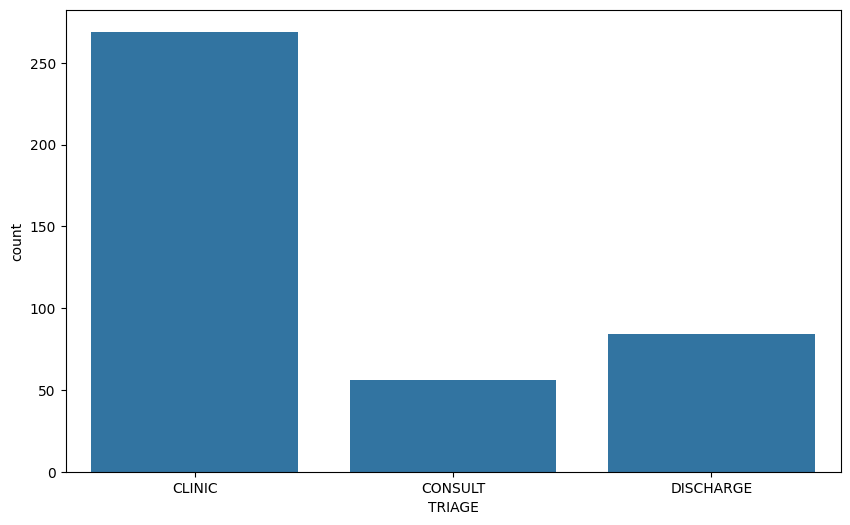

In [150]:
sns.countplot(x=dataframe.TRIAGE, data=dataframe)

#### Binaryzacja klasy decyzyjnej

<Axes: xlabel='TRIAGE', ylabel='count'>

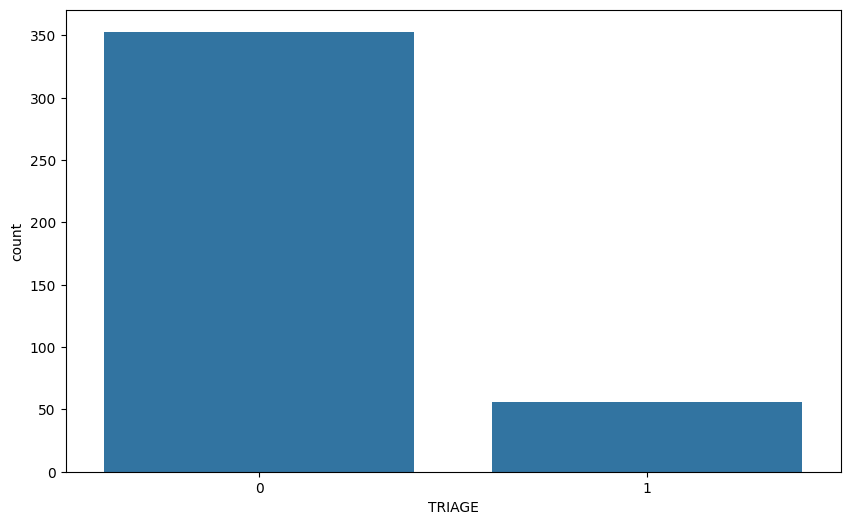

In [151]:
X = dataframe.drop(columns=['TRIAGE'])
X = pd.get_dummies(X)
X = X.to_numpy()
y = (dataframe.TRIAGE == "CONSULT").astype(int).to_numpy()


y_df = pd.DataFrame((dataframe.TRIAGE == "CONSULT").astype(int))
sns.countplot(x=y_df.TRIAGE, data=y_df)

#### Ocena klasyfikatora za pomocą 5-krotnej warstwowej walidacji krzyżowej (stratified crossvalidation) powtórzonej 3-krotnie 

In [152]:
# Ziarno losowania 
SEED = 42
N_SPLITS = 5
N_REPEATS = 3

In [153]:
# Compute Area Under the Curve (AUC) using the trapezoidal rule.
def auprc(y, pred): 
    fpr, tpr, _ = metrics.roc_curve(y, pred, pos_label=2)
    return metrics.auc(fpr, tpr)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
def auroc(y, pred):
    return metrics.roc_auc_score(y, pred)

In [154]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=SEED)
print(rskf.get_n_splits(X, y))

results = []
for i, (train_idx, test_idx) in enumerate(rskf.split(X, y)):
    print(f"Fold {i}:")
    X_tr, X_te = X[train_idx], X[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]

    clf = LogisticRegression(random_state=SEED).fit(X_tr, y_tr)
    assert list(clf.classes_) == [0, 1]
    y_pred = clf.predict_proba(X_te)[:,1]

    res = dict(classifier="LogisticRegression", iter=i // N_SPLITS, auprc=auprc(y_te, y_pred), auroc=auroc(y_te, y_pred))
    print(res)
    results.append(res)
    

15
Fold 0:
{'classifier': 'LogisticRegression', 'iter': 0, 'auprc': nan, 'auroc': 0.7772087067861716}
Fold 1:
{'classifier': 'LogisticRegression', 'iter': 0, 'auprc': nan, 'auroc': 0.7989756722151089}
Fold 2:


d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\2024-siwb\.venv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

{'classifier': 'LogisticRegression', 'iter': 0, 'auprc': nan, 'auroc': 0.7490396927016645}
Fold 3:
{'classifier': 'LogisticRegression', 'iter': 0, 'auprc': nan, 'auroc': 0.9238095238095237}
Fold 4:
{'classifier': 'LogisticRegression', 'iter': 0, 'auprc': nan, 'auroc': 0.7480519480519481}


d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\2024-siwb\.venv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

Fold 5:
{'classifier': 'LogisticRegression', 'iter': 1, 'auprc': nan, 'auroc': 0.8565941101152369}
Fold 6:
{'classifier': 'LogisticRegression', 'iter': 1, 'auprc': nan, 'auroc': 0.6670934699103713}
Fold 7:


d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\2024-siwb\.venv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

{'classifier': 'LogisticRegression', 'iter': 1, 'auprc': nan, 'auroc': 0.7989756722151089}
Fold 8:
{'classifier': 'LogisticRegression', 'iter': 1, 'auprc': nan, 'auroc': 0.886904761904762}
Fold 9:
{'classifier': 'LogisticRegression', 'iter': 1, 'auprc': nan, 'auroc': 0.8623376623376624}
Fold 10:


d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\2024-siwb\.venv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

{'classifier': 'LogisticRegression', 'iter': 2, 'auprc': nan, 'auroc': 0.8809218950064021}
Fold 11:
{'classifier': 'LogisticRegression', 'iter': 2, 'auprc': nan, 'auroc': 0.8361075544174136}
Fold 12:
{'classifier': 'LogisticRegression', 'iter': 2, 'auprc': nan, 'auroc': 0.8028169014084507}
Fold 13:


d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\2024-siwb\.venv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

{'classifier': 'LogisticRegression', 'iter': 2, 'auprc': nan, 'auroc': 0.7345238095238096}
Fold 14:
{'classifier': 'LogisticRegression', 'iter': 2, 'auprc': nan, 'auroc': 0.8311688311688312}


d:\2024-siwb\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\2024-siwb\.venv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
